In [ ]:
!pip install fireducks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 10.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pyarrow<18.0.0a0,>=14.0.0, but you have pyarrow 18.0.0 which is incompatible.
pylibcudf-cu12 24.10.1 requires pyarrow<18.0.0a0,>=14.0.0, but you have pyarrow 18.0.0 which is incompatible.


In [ ]:
%load_ext fireducks.pandas
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [ ]:



pd.set_option("display.max_rows", 25)

In [ ]:
!wget -nc https://archive.ics.uci.edu/static/public/911/recipe+reviews+and+user+feedback+dataset.zip
!unzip -n recipe+reviews+and+user+feedback+dataset.zip

--2024-12-01 19:25:35--  https://archive.ics.uci.edu/static/public/911/recipe+reviews+and+user+feedback+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘recipe+reviews+and+user+feedback+dataset.zip’

recipe+reviews+and+     [   <=>              ]   2.02M  4.11MB/s    in 0.5s    

2024-12-01 19:25:36 (4.11 MB/s) - ‘recipe+reviews+and+user+feedback+dataset.zip’ saved [2114088]

Archive:  recipe+reviews+and+user+feedback+dataset.zip
  inflating: Recipe Reviews and User Feedback Dataset.csv  


In [ ]:
recipes = pd.read_csv('/content/Recipe Reviews and User Feedback Dataset.csv')

## Feature Information

(Feature information taken directly from the UCI Machine Learning Repository page for Recipe Reviews and User Feedback page: https://archive.ics.uci.edu/dataset/911/recipe+reviews+and+user+feedback+dataset)
1. recipe name: {name of the recipe the comment was posted on}
2. recipe number: {placement of the recipe on the top 100 recipes list}
3. recipe code: {unique id of the recipe used by the site}
4. comment id: {unique id of the comment}
5. user id: {unique id of the user who left the comment}
6. user name: {name of the user}
7. user reputation: {internal score of the site, roughly quantifying the past behavior of the user}
8. create at: {time at which the comment was posted as a Unix timestamp}
9. reply count: {number of replies to the comment}
10. thumbs up: {number of up-votes the comment has received}
11. thumbs down: {number of down-votes the comment has received}
12. stars: {the score on a 1 to 5 scale that the user gave to the recipe. A score of 0 means that no score was given}
13. best score: {score of the comment, likely used by the site the help determine the order in the comments that appear in}
14. text: {the text content of the comment}

In [ ]:
print(f'Number of observations: {recipes.shape[0]}')
print(f'Number of features: {recipes.shape[1]}')

Number of observations: 18182
Number of features: 15


In [ ]:
recipes.describe()

,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,18182.000000,18182.000000,18182.000000,18182.000000,1.818200e+04,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,121.465295,38.689363,21773.667253,2.159608,1.623710e+09,0.014630,1.089264,0.549335,4.288802,153.162138
std,116.747893,29.786647,23965.109637,10.014666,5.468697e+06,0.137974,4.201004,3.470124,1.544786,141.075316
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,12.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,91.000000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,150.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,724.000000,100.000000,191775.000000,520.000000,1.665756e+09,3.000000,106.000000,126.000000,5.000000,946.000000


In [ ]:
nan_counts = recipes.isnull().sum()

print(nan_counts)

Unnamed: 0         0
recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               2
dtype: int64


In [ ]:
recipes.dropna(inplace=True)

In [ ]:
nan_counts = recipes.isnull().sum()

print(nan_counts)

Unnamed: 0         0
recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               0
dtype: int64


In [ ]:
recipes.head(5)

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [ ]:
recipes.iloc[0]['text']

'I tweaked it a little, removed onions because of onion haters in my house, used Italian seasoning instead of just oregano, and use a paprika/ cayenne mix and a little more than the recipe called for.. we like everything a bit more hot. The chili was amazing! It was easy to make and everyone absolutely loved it. It will now be a staple meal in our house.'

In [ ]:
revLenCol = []
for index, row in recipes.iterrows():
  revLenCol.append(len(row['text']))
recipes['text_len'] = revLenCol

In [ ]:
recipes.shape

(18180, 16)

## Exploring a single user

In [ ]:
user_freq = recipes['user_id'].value_counts()
user_freq

user_id
u_1oKVZzipo1u8lcqQzDUcw4UBn9e    25
u_1oKVZoIOMWJ2j7TA7py2BIbf1mm    23
u_1oKVZmYPulmUFbvGiBA8U3uRR6D    23
u_1oKVeN9YNf07RT0P9R63Yu80P5A    23
u_1oKVZdmUbQTYMVdbXOpVfRQuHm9    23
                                 ..
u_1oKVqPf8DUgEUpAArB6gswGOAyy     1
u_1oKZAX4gzD4vPF29KJdX4BAhdYr     1
u_1oKblS4ULpTAACUTILo0QlO5mrN     1
u_1oKY7CKLaFQpI3cBCVaxHXAEGbt     1
u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ     1
Name: count, Length: 13812, dtype: int64

In [ ]:
recipes['user_id'].value_counts().describe()
# vast majority of users have left only one comment

count    13812.000000
mean         1.316247
std          1.176873
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         25.000000
Name: count, dtype: float64

In [ ]:
user = 'u_1oKVZoIOMWJ2j7TA7py2BIbf1mm'
user_comments = recipes[recipes['user_id'] == user]
display(user_comments.shape)
display(user_comments.head(4))

(23, 16)

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,text_len
198,198,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_274376,u_1oKVZoIOMWJ2j7TA7py2BIbf1mm,mjlouk,1,1622717685,0,0,0,5,100,So good! My husband and I really liked it! B...,85
1591,428,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_129814,u_1oKVZoIOMWJ2j7TA7py2BIbf1mm,mjlouk,1,1622716984,0,0,0,4,100,DH and I liked it but my kids wouldn&#39;t eve...,116
2004,116,4,17826,Amish Breakfast Casserole,sp_aUSaElGf_17826_c_338332,u_1oKVZoIOMWJ2j7TA7py2BIbf1mm,mjlouk,1,1622717987,0,1,0,5,193,This was great! I used ricotta instead of cot...,139
2377,151,5,42386,Pumpkin Spice Cupcakes with Cream Cheese Frosting,sp_aUSaElGf_42386_c_340730,u_1oKVZoIOMWJ2j7TA7py2BIbf1mm,mjlouk,1,1622718015,0,0,0,4,100,"This was really good, even though I cheated an...",94


In [ ]:
user_comments.describe()

,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text_len
count,23.000000,23.000000,23.000000,23.0,2.300000e+01,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,100.217391,46.956522,29133.869565,1.0,1.622715e+09,0.043478,0.347826,0.043478,4.521739,129.478261,110.521739
std,84.553349,30.805074,41570.062587,0.0,1.434069e+04,0.208514,0.647281,0.208514,0.665348,52.840988,81.146259
min,20.000000,1.000000,414.000000,1.0,1.622649e+09,0.000000,0.000000,0.000000,3.000000,100.000000,25.000000
25%,56.000000,22.000000,7106.000000,1.0,1.622717e+09,0.000000,0.000000,0.000000,4.000000,100.000000,49.500000
50%,74.000000,50.000000,17826.000000,1.0,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000,101.000000
75%,110.500000,69.500000,35223.500000,1.0,1.622718e+09,0.000000,0.500000,0.000000,5.000000,146.500000,139.000000
max,428.000000,99.000000,191775.000000,1.0,1.622718e+09,1.000000,2.000000,1.000000,5.000000,253.000000,407.000000


<Axes: >

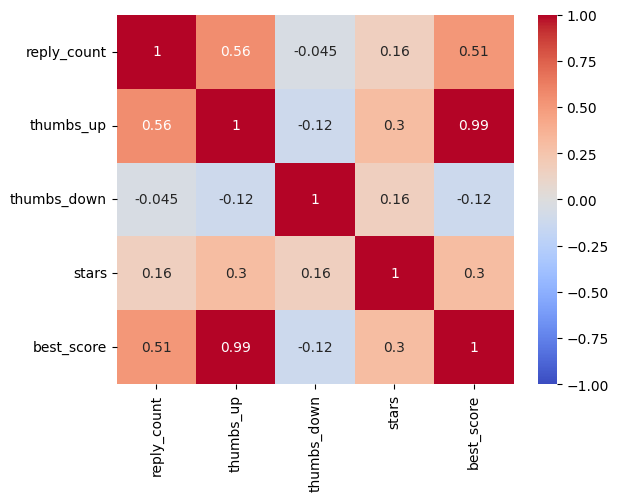

In [ ]:
user_comments1 = user_comments[['reply_count', 'thumbs_up', 'thumbs_down', 'stars', 'best_score']]
sns.heatmap(user_comments1.corr(), annot = True, vmin=-1, vmax=1, center= 0,cmap='coolwarm')

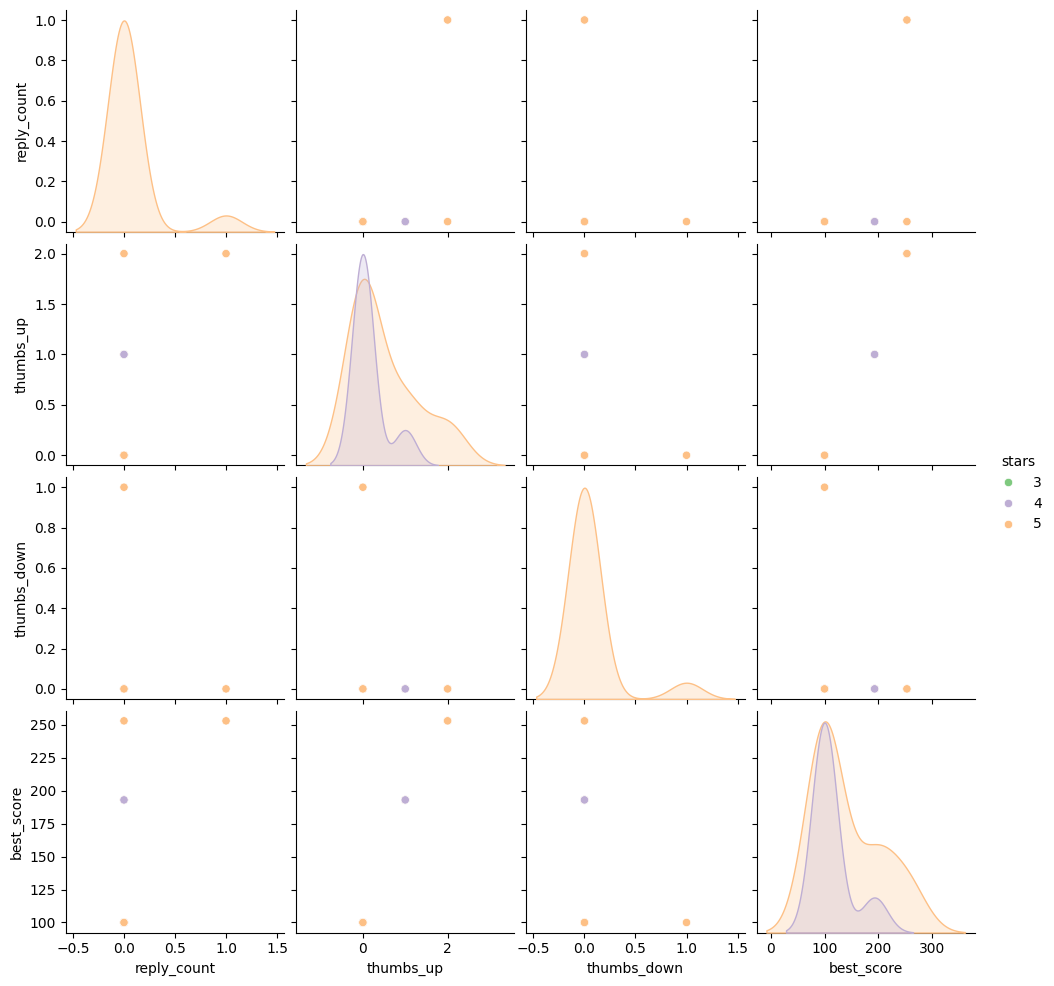

In [ ]:
sns.pairplot(user_comments1, hue='stars', palette='Accent')

# Exploring a single recipe

In [ ]:
recipes['recipe_code'].value_counts()

recipe_code
2832     724
14299    654
3309     509
42083    421
32480    397
        ... 
18341     96
1821      90
3683      86
34347     86
17022     31
Name: count, Length: 100, dtype: int64

As the recipe_code is the unique identifier for a given recipe in the dataset, we can use value_counts() in order to explore how often recipes were reviewed by individuals in this dataset. The counts highlight that the minimum number of reviews received was 31 with the maximum being 725.

In [ ]:
recipes['recipe_code'].value_counts().describe()

count    100.000000
mean     181.800000
std      106.732177
min       31.000000
25%      128.000000
50%      149.000000
75%      191.750000
max      724.000000
Name: count, dtype: float64

Furthermore, we look at the summary statistics to highlight the typical number of reviews that a recipe would receive within this dataset. Utilizing the mean and standard deviation, we can see that 50% of the reviews in this dataset received between 75 and 287 reviews.

In [ ]:
r_code = 3309 #r_code for "Best Ever Banana Bread"
chosen_recipe_reviews = recipes[recipes['recipe_code'] == r_code]
display(chosen_recipe_reviews.shape)
display(chosen_recipe_reviews.head(10))

(509, 16)

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,text_len
654,0,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_2FolwA0WHirT2q7DDTqyFJ0GvGR,u_fjZn9UjnYY9Y,ritajandj,1,1665166553,0,0,0,5,510,This is the best recipe for banana bread I&#39...,381
655,1,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_2Ep40E2YQon3AZ6OBn6AzjlOUgc,u_qW2rjMVr5SYl,mrscessna,50,1663278966,0,0,0,4,488,sweet and moist! I will be making this again,45
656,2,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_2CWVCrfxczs1PGguLbIdM8r88A3,u_iWjGINSSoqyU,danielleylee,10,1658918203,0,8,0,5,825,I made this bread with one minor twist. I live...,554
657,3,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_2CBnWlxTIM2CGJ64QmWioAeAAop,u_j6XdnbRT1vtZ,Joan9859,70,1658284879,0,6,1,5,750,"In place of the 1/2 cup of oil, I used another...",126
658,4,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_29vulYmOzERr8m6p1G9qbK3viNC,u_f2qPJ3428ktq,dcscake_OH,20,1654006031,0,4,0,5,759,"Made this for my book club, but used sour crea...",138
659,5,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_29XwzUPWVbOp8GBLSXh5bEUAiNc,u_RKjgrUNMQ2nL,Jody939,1,1653273000,0,6,1,5,759,This recipe has an amazing flavor. I did chan...,484
660,6,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_28oSUFIyMS5O0XCRvOoxBcHs1IY,u_3sizCBCgDxYv,inotsmile,1,1651881458,0,12,3,5,763,I have made this recipe several times. My fam...,445
661,7,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_28E25mUNpj5EtSosg5szn9jn8Av,u_lWOi5Uvd2Crc,KristineChayes576,50,1650767243,0,3,0,5,710,Best Ever Banana Bread is a great recipe! No a...,66
662,8,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_26sxNJFIsm6NTGmS8herPP3EqUT,u_XzUnohKrX5xj,jkhafer@yahoo.com,1,1648498961,0,11,1,5,804,Add 1 tsp cinnamon to dry ingredients and it m...,80
663,9,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_25fGq9WwhfmiXO7A3hmzhBCVBsT,u_nWwqfttBORnl,Raynebow68,1,1645910916,0,5,1,5,728,Best banana bread ever. Used pecans instead of...,112


To explore what a given recipe looks like, we selected the recipe associated with recipe_code 3309. This is the "Best Ever Banana Bread" recipe which has 509 reviews left on it. We can utilize this recipe as an example of the information we can extract from a single recipe and the individuals who interacted with it.

In [ ]:
chosen_recipe_reviews.value_counts('stars',sort=False)

stars
0         24
1          7
2          7
3          8
4         25
5        438
Name: count, dtype: int64

Here we can see the distribution of ratings applied by users to this recipe. Before looking at the descriptive statistics, it is clear that users tend to rate this recipe 5/5 stars.

In [ ]:
chosen_recipe_reviews['stars'].describe()

count    509.000000
mean       4.587426
std        1.211298
min        0.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: stars, dtype: float64

<Axes: xlabel='stars', ylabel='count'>

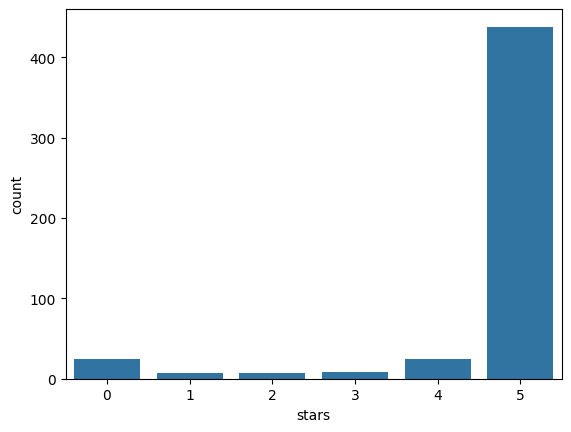

In [ ]:
sns.countplot(data=chosen_recipe_reviews, x='stars')

In [ ]:
len_text = []

for index,row in chosen_recipe_reviews.iterrows():
  len_text.append(len(row['text']))

chosen_recipe_reviews['text_len'] = len_text

In [ ]:
chosen_recipe_reviews

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,text_len
654,0,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_2FolwA0WHirT2q7DDTqyFJ0GvGR,u_fjZn9UjnYY9Y,ritajandj,1,1665166553,0,0,0,5,510,This is the best recipe for banana bread I&#39...,381
655,1,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_2Ep40E2YQon3AZ6OBn6AzjlOUgc,u_qW2rjMVr5SYl,mrscessna,50,1663278966,0,0,0,4,488,sweet and moist! I will be making this again,45
656,2,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_2CWVCrfxczs1PGguLbIdM8r88A3,u_iWjGINSSoqyU,danielleylee,10,1658918203,0,8,0,5,825,I made this bread with one minor twist. I live...,554
657,3,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_2CBnWlxTIM2CGJ64QmWioAeAAop,u_j6XdnbRT1vtZ,Joan9859,70,1658284879,0,6,1,5,750,"In place of the 1/2 cup of oil, I used another...",126
658,4,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_29vulYmOzERr8m6p1G9qbK3viNC,u_f2qPJ3428ktq,dcscake_OH,20,1654006031,0,4,0,5,759,"Made this for my book club, but used sour crea...",138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,504,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_320144,u_1oKVeHuqdSi3qtGpC4CAQtwoMyk,lsarets,1,1622717927,0,0,0,5,100,This is truly the best ever banana bread. Ver...,66
1159,505,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_372056,u_1oKbcjlgoks8YZXEacSMP9ctRfs,pamela39,1,1622718171,0,0,0,5,100,Wonderful recipe! Best Banana Bread I&#39;ve e...,156
1160,506,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_242245,u_1oKVjITIzZrIwoHcLYNUd4lP021,lssrls,1,1622717545,0,0,0,5,100,Made this for the first time and it is delicio...,83
1161,507,2,3309,Best Ever Banana Bread,sp_aUSaElGf_3309_c_119354,u_1oKVZbmXe034ZVsauDi7AuMVJCI,Joscy,1,1622716936,0,0,0,5,100,Best Ever Banana Bread is a favorite at our ho...,346


After extracting the lengths of the reviews for this recipe, we can preliminarily visualize whether there is a relationship between review length and given score. This is just one example of how we could extract information from the review text feature and then use it to predict recipe rating.

<Axes: xlabel='text_len', ylabel='stars'>

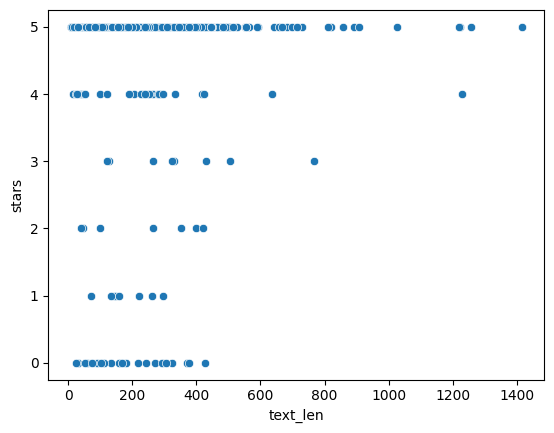

In [ ]:
sns.scatterplot(data=chosen_recipe_reviews, x='text_len', y='stars')

# Combining Users and Recipes

In [ ]:
usersPerRecipe = defaultdict(set)
recipesPerUser = defaultdict(set)
recipeIDtoName = {}
userIDtoName = {}

for index,row in recipes.iterrows():
  recipe, user, recName, username = row['recipe_code'], row['user_id'], row['recipe_name'], row['user_name']
  recipeIDtoName[recipe] = recName
  userIDtoName[user] = username
  usersPerRecipe[recipe].add(user)
  recipesPerUser[user].add(recipe)

Here we are creating a dictionary which links the users of a given recipe to to a recipe_code as well as a dictionary which links reviews to a given user. This would allow for facilitating looking at overlaps between users who share common recipes reviewed.

In [ ]:
currentRecipe = 2832
print(recipeIDtoName[currentRecipe])
usersPerRecipe[currentRecipe]

Cheeseburger Soup


{'u_14Jt3Onn7vE8',
 'u_1JqI0KynEApl',
 'u_1oKVZXzP64U03Y1r3DIJ5He5wZl',
 'u_1oKVZaxgZr9JqCUTsowfyIT48aS',
 'u_1oKVZbbOJiAxmbAxRUolzjUrKDi',
 'u_1oKVZbcNg5NYW87grfhDXNePwbL',
 'u_1oKVZdntxwYzxksw1IqW0kld9jH',
 'u_1oKVZfQBhgRUCOwfHv6F4RA51zQ',
 'u_1oKVZg1DVmIpML6RYl0Vhh6hcJm',
 'u_1oKVZibiPJd5Mv0tuRswBqWOVWD',
 'u_1oKVZj2JQOqYRqPmcdZsFtwNOrx',
 'u_1oKVZj4aBY2EoyywYL0bjfbagtL',
 'u_1oKVZjBYxHQxhJkgDmxTGIXTCIG',
 'u_1oKVZjgpdznQpEBEtXA1bOrmzL0',
 'u_1oKVZmYPulmUFbvGiBA8U3uRR6D',
 'u_1oKVZoIOMWJ2j7TA7py2BIbf1mm',
 'u_1oKVZoZ2m9nE7bLNmSXNw4MdYcU',
 'u_1oKVZpdzBp5PQHOM4PGQOZo1ujc',
 'u_1oKVZskcWCF2NqqbEvMCAEXAZIG',
 'u_1oKVZtSdpfy5KrVbAXHeHU0QI4v',
 'u_1oKVZuqBVMf8IBAX9Lp2wMHJFOL',
 'u_1oKVZvcir01Ja6U1XIczcrh8mbP',
 'u_1oKVZw7mrwjQMxXSztLnhcVRC0b',
 'u_1oKVZxAOR5BEzyF4H6ENc7jwfUW',
 'u_1oKVZxNyweYeP3lQTMS89TQLWg3',
 'u_1oKVZzipo1u8lcqQzDUcw4UBn9e',
 'u_1oKVa1vU0P0wtIMwn8FBys0ptHj',
 'u_1oKVa2nlJX0DjsXaTen7cSJO3RY',
 'u_1oKVa3dm9k4sQJZuEACIlelurOi',
 'u_1oKVa4NSseUH7Ypn2zzEhhCFguB',
 'u_1oKVa5

Looking at recipe_code 2832 (Cheeseburger Soup) we can see that there a significant number of users who have left reviews on this particular recipe. We can then select from this list of users to see if there are further overlaps within their reviews.

In [ ]:
currentUser1 = 'u_1oKVZoIOMWJ2j7TA7py2BIbf1mm'
print(userIDtoName[currentUser1])
recipesPerUser[currentUser1]

mjlouk


{414,
 957,
 2832,
 3143,
 4444,
 6504,
 7708,
 9735,
 14299,
 15805,
 16579,
 17826,
 18341,
 18345,
 19201,
 27434,
 32264,
 38183,
 39545,
 42083,
 42386,
 100276,
 191775}

In [ ]:
currentUser2 = 'u_1oKVa6DRYXqOVPHLzyZwE55UjOh'
print(userIDtoName[currentUser2])
recipesPerUser[currentUser2]

lilaccrew


{2832, 39549}

In [ ]:
recipeIDtoName[39549]

'Forgotten Jambalaya'

We can then compare mjlouk and lilaccrew and their preferences for recipes. More specifically, since both of these individuals left reviews on this cheeseburger soup recipe; we can then extend the question to whether or not each of the individual users would be interested in the other recipes which the other person left reviews on. Since lilaccrew also left a review on the Forgotten Jambalaya, there is a likelihood that mjlouk might also.

# TF-IDF Generation

In [ ]:
!pip install fuzzywuzzy

In [ ]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 39.5 MB/s eta 0:00:00


In [ ]:
!pip install levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.5 MB/s eta 0:00:00


In [ ]:
import string
from fuzzywuzzy import fuzz
from spellchecker import SpellChecker

# Function to replace incorrect words with correct ones
def replace_incorrect_words(text, corrections):
    for incorrect, correct in corrections.items():
        text = text.replace(incorrect, correct)
    return text

#Function to clean text
def clean_and_tokenize(text):
    remove_chars = string.punctuation
    translator = str.maketrans('', '', remove_chars)
    # Remove punctuation and digits, convert to lower case, and split into words
    words = text.translate(translator).lower()
    return words

def preprocess_correct_words(correct_words):
    word_dict = defaultdict(list)
    for word in correct_words:
        key = word[0]  # Grouping by the first letter
        word_dict[key].append(word)
    return word_dict

def correct_typos(text, word_dict, threshold=70):
    words = text.split()
    corrected_words = []
    for word in words:
        key = word[0]
        corrected = False
        for correct_word in word_dict[key]:
            if fuzz.ratio(word.lower(), correct_word.lower()) > threshold:
                corrected_words.append(correct_word)
                corrected = True
                break
        if not corrected:
            corrected_words.append(word)
    return ' '.join(corrected_words)

In [ ]:
# This cell is used to check the original improper words.
cleaned_recipes = recipes.copy()

# Clean text from punctuation and capitalization
cleaned_recipes['text'] = cleaned_recipes['text'].apply(clean_and_tokenize)

all_text = ' '.join(cleaned_recipes['text'])
all_words = all_text.split()
unique_words = set(all_words)
unique_words_list = list(unique_words)


spell = SpellChecker()
misspelled_words = spell.unknown(unique_words_list)

print(f'Incorect Word Count: {len(misspelled_words)}')
print(misspelled_words)

Incorect Word Count: 8459
{'functioneven', '34white', 'ck', 'yearsever', 'allpupose', 'greatoldguy347', 'montheverybody', 'mevery', '10x15x1', 'sray', 'fam', 'grabit', 'cup34', 'sauceyummy', 'tenderquite', '34gooey34', 'chilestomatoes', 'crema', '18month', 'themand', 'kellogg', 'onesboth', 'glutenfree', 'you39e', 'awesomejust', 'frostingyum', 'london', 'caloriesis', 'bread”', 'cannned', 'sidedish', 'itp', 'bluberries', 'traditioanl', 'from34', 'greatimake', 'br', '34just', 'everybody’s', '“cheeseburger', 'ellicott', 'year5', 'ingrediants', 'niblets', 'flourppjanep', '¼', 'shareel', 'tooppp', 'bittook', 'meatballsso', '34topped34', 'pleasewhat', 'substitue', 'site39s', 'vegitables', 'a10', 'againwe', 'carolbrummett', 'forrich', '2pds', 'smucker’s', 'delowensteinp', 'cauliflowerand', 'websiteone', 'bergeron', 'seperate', 'delicious—even', '5tbsp', 'find12', 'hadand', 'decendent', 'reviewer39s', '12tsp', 'veryy', 'salsavery', 'timeexcellent', 'dessrt', 'formore', 'flakes12tsp', 'dessertei

# Manual Cleaning

When correcting words like contractions such as "don't" or other words with apostrophes, I think we should just leave off the apostrophe. For example, correct "don't" to "dont" since we are removing all punctuation to perform tf-idf. Additionally some error text produces numbers combined with words. Just use best judgement to determine if the numbers are actually important or are just erroneous text.

In [ ]:
# This dictionary is for separating words that are incorrectly combined
# The key is the combined word and the value should be the words separated
# This dictionary should only be used to separate combined words and not to fix typos.
# Also using for number corruptions and shorthand (gr8 -> great)
corrections = {
    'chickenspinach': 'chicken spinach', 'cheesepeanut': 'cheese peanut', 'nervewracking': 'nerve-wracking', 'peppersdont': 'peppers dont', 'doublechecked': 'double-checked',
    'creamcheese': 'cream cheese', 'anyday': 'any day', 'allday': 'all day', 'everytime': 'every time', 'milkcream': 'milk cream', 'coffeewater': 'coffee water',
    'likethis': 'like this', 'mixthis': 'mix this', '9year': '9 year', 'foodgood': 'food good', 'addchange': 'add change', 'havecooked': 'have cooked', 'cookedthese': 'cooked these',
    'recipecutting': 'recipe cutting', 'cakedessert': 'cake dessert', 'onceinawhile': 'once in a while', 'ourfriends': 'our friends',
    'deliciousdefinitely': 'delicious definitely', 'myfamily': 'my family', 'fillingdifferent': 'filling different', 'platethis': 'plate this', 'gettogether': 'get together',
    'easytomake': 'easy to make', 'toolittle': 'too little', 'coldweather': 'cold weather', 'juiceawesome': 'juice awesome',
    'amazingmake': 'amazing make', 'sweetespecially': 'sweetespecially', 'bruncheveryone': 'brunch everyone', 'texturekids': 'texture kids', 'supereasy': 'super easy',
    'afterthe wedding': 'after the wedding', 'chinesestyle': 'chinese-style', 'itadded': 'it added', 'bakednote': 'baked note', 'questionwhat': 'question what', 'bestif': 'best if',
    'piesbecause': 'pies because', 'sisiterinlaw': 'sister-in-law', '12on': '12 on', 'okthanks': 'ok thanks', 'mixedfrom': 'mixed from', 'chewycrispy': 'chewy crispy',
    'versionthen': 'version then', 'wantsneeds': 'wants needs', '59oz': '59 oz', 'againthough': 'again though', '8x8inch': '8x8 inch', '4tsp': '4 tsp', 'miniloaf': 'mini loaf',
    'gumbolike': 'gumbo-like', 'omgosh': 'oh my gosh', 'exceptthe': 'except the', 'thisit39s': 'this is', 'hotspicy': 'hot spicy', 'sorrybut': 'sorry but', 'sweetespecially': 'sweet especially',
    'recipemeaning': 'recipe meaning', 'flavorand': 'flavor and', 'bookclub': 'book-club', 'parchmentwax': 'parchment wax', 'bacontasted': 'bacon tasted', '350°': '350 degrees',
    'pecansmaybe': 'pecans maybe', 'yolkwater': 'yolk water', 'entreevery': 'entree very', 'saucehad': 'sauce had', 'suggestionsthoughts': 'suggestions thoughts', 'substitutionsi': 'substitutions I',
    'crockpot': 'crock-pot', 'lowcalorie': 'low calorie', 'buttermicrowaves': 'butter microwaves',
    'theseput': 'these put',
    'brothkicked': 'broth kicked',
    'desertwill': 'desert will',
    'cheesethat': 'cheese that',
    'chilisoup': 'chili soup',
    'poppyseeds': 'poppy seeds',
    'differenttypes': 'different types',
    'shreddedreally': 'shredded really',
    'mixvery': 'mix very',
    'potput': 'pot put',
    'awesomedelicious': 'awesome delicious',
    'stepbystep': 'step-by-step',
    'moremaybe': 'more maybe',
    'hadsuper': 'had super',
    'triedandtrue': 'tried and true',
    'doughboys': 'dough boys',
    'partskim': 'part skim',
    'pepperthen': 'pepper then',
    'nightwas': 'night was',
    'functioneven': 'function even',
    'patinthepan': 'pat in the pan',
    'flourthey': 'flour they',
    '12oz': '12 oz',
    'cauliflowerbetter': 'cauliflower better',
    'toomakes': 'too makes',
    'seasoningsperfecto': 'seasonings perfecto',
    'thanksjen': 'thanks jen',
    'breadrolls': 'bread rolls',
    'offthat': 'off that',
    'saidexcept': 'said except',
    'aprilmay': 'april may',
    'sauceyummy': 'sauce yummy',
    'jelloif': 'jello if',
    '8yearold': '8-year-old',
    'timenot': 'time not',
    'carrotpea': 'carrot pea',
    'nowthe': 'now the',
    'correctlythey': 'correctly they',
    'crowdwhen': 'crowded when',
    'isit': 'is it',
    'sugarspice': 'sugar spice',
    'splitingcracking': 'splitting cracking',
    'workthis': 'work this',
    'browningalso': 'browning also',
    'toppingwaste': 'topping waste',
    'zucchinimy': 'zucchini my',
    'amishmennonite': 'amish mennonite',
    'imade': 'I made',
    'trayspoured': 'trays poured',
    'rouxbased': 'roux-based',
    'coarselychopped': 'coarsely chopped',
    'breezeto': 'breeze to',
    '18month': '18 month',
    'zucchinihating': 'zucchini hating',
    'tastymoist': 'tasty moist',
    'pieswhich': 'pies which',
    'pecanswalnuts': 'pecans walnuts',
    'wellmaybe': 'well maybe',
    'sisinlaw': 'sis-in-law',
    'cakedont': 'cake dont',
    'thisnormally': 'this normally',
    'creamystyle': 'creamy style',
    'goldenbrown': 'golden-brown',
    'degreesso': 'degrees so',
    'itnever': 'it never',
    'recipemmmmmmmmmmmmm': 'recipe mmmmmmmmmmmmm',
    'leftbig': 'left big',
    '34tops34': 'tops',
    '34kick34': 'kick',
    '34why34': 'why',
    '39green39': 'green',
    '34doctored34': 'doctored',
    '34let39s': 'lets',
    '39applesauce39': 'applesauce',
    '34poof34': 'poof',
    '34basket34': 'basket',
    '34wonderful34': 'wonderful',
    '39temper39': 'temper',
    '34special': 'special',
    '34sugar34': 'sugar',
    '34ton34': 'ton',
    '34bubble34': 'bubble',
    'preppingcutting': 'prepping cutting',
    'colorssadly': 'colors sadly',
    'flourwater': 'flour water',
    '2pound': '2 pound',
    'potatoesturned': 'potatoes turned',
    'thankyou': 'thank you',
    'heavyas': 'heavy as',
    'velveetaand': 'velveeta and',
    'potatoeswill': 'potatoes will',
    'gr8': 'great',
    'meatbean': 'meat bean',
    'oventhey': 'oven they',
    'overlydelicious': 'overly delicious',
    'bracesteeth': 'braces teeth',
    'chickenapple':'chicken apple',
    'phenomenallove': 'phenomenal love',
    'garnishgood': 'garnish good',
    'anybut': 'any but',
    'besurprised': 'be surprised',
    'olivesthe': 'olives the',
    'costeffectiveness': 'cost-effectiveness',
    'fullbodied': 'full-bodied',
    'cupcakesgrandma': 'cupcakes grandma',
    'bittook': 'bit took',
    'yogurtjello39s': 'yogurt jellos',
    'redfat': 'red fat',
    'makeand': 'make and',
    'andstir': 'and stir',
    '2gether': 'together',
    '3rd': 'third',
    'saucejuice': 'sauce juice',
    'amazingthis': 'amazing this',
    'itbecause': 'it because',
    'hand34': 'hand',
    'recipeyou': 'recipe you',
    'youstart': 'you start',
    'candylike': 'candy like',
    '34corn': 'corn',
    'soupfast': 'soup fast',
    'pepperjackcheddar': 'pepper jack cheddar',
    'piecesinstead': 'pieces instead',
    '34raw34': 'raw',
    'saladthank': 'salad thank',
    'fallwinter': 'fall winter',
    'amountenough': 'amount enough',
    '34hot34': 'hot',
    'it…does': 'it does',
    '34soup': 'soup',
    'secondsthey': 'seconds they',
    'servingadds': 'serving adds',
    '34from': 'from',
    'beautifuland': 'beautiful and',
    'familyfriends': 'family friends',
    'buttercream': 'butter cream',
    '34favorites34': 'favorites',
    '34after': 'after',
    'greattasting': 'great tasting',
    'recipedirections': 'recipe directions',
    'puddingdelicious': 'pudding delicious',
    'displayed39': 'displayed',
    'beautifulthank': 'beautiful thank',
    'birthdayfollowed': 'birthday followed',
    'myhouse': 'my house',
    'nofat': 'no fat',
    'soupsbased': 'soups based',
    'leafpumpkin': 'leaf pumpkin',
    'spicyuse': 'spicy use',
    'bitethen': 'bite then',
    'timeoverall': 'time overall',
    'chickencooking': 'chicken cooking',
    '34ground': 'ground',
    'outif': 'out if',
    'sugarperfect': 'sugar perfect',
    '34butter34': 'butter',
    'tasteeffect': 'taste effect',
    'recipeone': 'recipe one',
    '39companygood39': 'company good',
    'tastingit': 'tasting it',
    'turkey2': 'turkey',
    '34monster34': 'monster',
    '34recipe': 'recipe',
    '34extra': 'extra',
    'onionhamburger': 'onion hamburger',
    'esp': 'especially',
    'standards”': 'standards',
    'team39s': 'teams',
    '34pineapple': 'pineapple',
    'betterswitched': 'better switched',
    '34thank': 'thank',
    'beforeassembling': 'before assembling',
    '34thank': 'thank',
    'flourmaybe': 'flour maybe',
    'themspan': 'them span',
    'brownused': 'brown used',
    'timedemanding': 'time-demanding',
    'restaurantlovelyyummy': 'restaurant lovely yummy',
    'barlike': 'bar like',
    'sugarthanks': 'sugar thanks',
    'chickenvegetable': 'chicken vegetable',
    'butterbased': 'butter based',
    'menu39': 'menu',
    'sweetsalty': 'sweet salty',
    'prettyand': 'pretty and',
    '34basic': 'basic',
    'thiswonderful': 'this wonderful',
    'statecheeseburger': 'state cheeseburger',
    'ovenand': 'oven and',
    'comfortfood': 'comfort food',
    'saltbecause': 'salt because',
    'arewe': 'are we',
    'tender34': 'tender',
    'happylady': 'happy lady',
    'leftoverswhich': 'leftovers which',
    'slowcooker': 'slow cooker',
    'impressedthe': 'impressed the',
    'porcupinelooking': 'porcupine-looking',
    'onelove': 'one love',
    'bunsthis': 'buns this',
    'guiltfree': 'guilt-free',
    '39topping39': 'topping',
    'coworker39s': 'coworkers',
    'produce102014': 'produce',
    'enoughand': 'enough and',
    '34add': 'add',
    'fillingalso': 'filling also',
    'sweetrich': 'sweet rich',
    'cinnamonusing': 'cinnamon using',
    'pan34': 'pan',
    'greatevery': 'great every',
    'familythey': 'family they',
    'potatoesbacon': 'potatoes bacon',
    '34noodles34': 'noodles',
    'suggestedone': 'suggested one',
    'sidedish': 'side dish',
    'tastenot': 'taste not',
    'websiteone': 'website one',
    'feelingsenjoy': 'feelings enjoy',
    '34meatloaf': 'meatloaf',
    'againsoon': 'again soon',
    'onepeach': 'one peach',
    'publishedone': 'published one',
    'variety34': 'variety',
    'quanitytherefore': 'quanity therefore',
    'hotsweet': 'hot sweet',
    'onionsprinkled': 'onion sprinkled',
    'flakymoisture': 'flaky moisture',
    '39dough39': 'dough',
    'sometimessausage': 'sometimes sausage',
    'oneofmymostrequested': 'one of my most requested',
    'touchaway': 'touch away',
    '34cheesy': 'cheesy',
    'beef34': 'beef',
    'applesauceinstead': 'apple sauce instead',
    'falltime': 'fall time',
    '34comforting34': 'comforting',
    'sauce34': 'sauce',
    'microwavesafe': 'microwave safe',
    'selfconscious': 'self-conscious',
    '41122made': 'made',
    'say39s': 'says',
    'it…okay…changed': 'it okay changed',
    'added34': 'added',
    'breezepat': 'breeze pat',
    'granulesreally': 'granules really',
    'browncould': 'brown could',
    'hiteven': 'hit even',
    'afraidit': 'afraid it',
    'tonight39s': 'tonights',
    '9inch': '9 inch',
    'pea39s': 'peas',
    '34jiffy34': 'jiffy',
    'colbymonterey': 'colby monterey',
    'noboil': 'no boil',
    'greatkids': 'great kids',
    'ovenready': 'oven ready',
    'timesaving': 'time-saving',
    'citrustype': 'citrus type',
    '39maple': 'maple',
    '34test': 'test',
    'lunchsize': 'lunch size',
    'basenot': 'base not',
    'bestvery': 'best very',
    'lowsodium': 'low sodium',
    'thenplease': 'then please',
    'zucchinisincerely': 'zucchini sincerely',
    'deboned': 'de-boned',
    'cinnamonsugar': 'cinnamon sugar',
    'upstuffed': 'up stuffed',
    'itjust': 'it just',
    'liquidwet': 'liquid wet',
    'seedsmy': 'seeds may',
    'cornmeal1': 'cornmeal',
    'coolweather': 'cool weather',
    'cheesesadded': 'cheeses added',
    '34some': 'some',
    'andmight': 'and might',
    'recipeentire': 'recipe entire',
    'semihealthy': 'semi-healthy',
    'runningat': 'running at',
    'againthey': 'again they',
    '39doesn39t': 'doesnt',
    'oniongreen': 'onion green',
    'lockdown': 'lock down',
    'zucchiniworks': 'zucchini works',
    'cauliflowerand': 'cauliflower and',
    'roomtemp': 'room temp',
    'that39ll': 'thatll',
    'husband46041': 'husband',
    'thank39s': 'thanks',
    'tonightit': 'tonight it',
    'luckwhere': 'luck where',
    '34pickles': 'pickles',
    'recipedelicious': 'recipe delicious',
    'bowlabsolutely': 'bowl absolutely',
    'gravysauce': 'gravy sauce',
    '34ever34': 'ever',
    'pepperonion': 'pepper onion',
    'meatonions': 'meat onions',
    'flourused': 'flour used',
    'dayif': 'day if',
    'platesi': 'plaates I',
    'winterthanks': 'winter thanks',
    'zucchiniyou': 'zucchini you',
    'noodlesand': 'noodles and',
    'leftthank': 'left thank',
    '34his': 'his',
    '34crumbs34': 'crumbs',
    'souphave': 'soup have',
    'questioncould': 'question could',
    'raviloianother': 'ravioli another',
    'flourmilk': 'flour milk',
    'dinnereveryone': 'dinner everyone',
    'friendlyand': 'friendly and',
    'lasagnaand': 'lasagna and',
    'layersfor': 'layers for',
    '34fresh34': 'fresh',
    'makethat': 'make that',
    'mexiblend': 'mexican blend',
    'meatandpotato': 'meat and potato',
    'rice39': 'rice',
    'nutricious': 'nutritious',
    'pbampjs': 'pb and js',
    'france39s': 'frances',
    'pepper39s': 'peppers',
    'allout': 'all out',
    'overbakemine': 'overbake mine',
    '1cup': 'one cup',
    '34crock': 'crock',
    'bartholomew39s': 'bartholomews',
    '34rainbow': 'rainbow',
    'itfor': 'itfor',
    'tipdidn39t': 'tip didnt',
    'sauceand': 'sauce and',
    'foundthe': 'found the',
    'maketry': 'make try',
    '34looks': 'looks',
    'toojust': 'too just',
    'anytimes': 'any times',
    'casserole’': 'casserole',
    'peacheswill': 'peaches will',
    'muchi39ll': 'much ill',
    'beforei': 'before i',
    '34feels34': 'feels',
    '34casserole34': 'casserole',
    'creamstill': 'cream still',
    '34better': 'better',
    'minuteswhile': 'minutes while',
    'rice34': 'rice',
    'welland': 'well and',
    'goodi': 'good',
    'pik': 'pick',
    'andcame': 'and came',
    '\“coffee\”': 'coffee',
    'momof3': 'mom of three',
    '\“slight': 'slight',
    'itwe': 'it we',
    'ughfor': 'ugh for',
    'bestmake': 'best make',
    'usedkey': 'used key',
    'forfantastic': 'for fantastic',
    '34fake34': 'fake',
    'children39s': 'children',
    'disposalnot': 'disposal not',
    'france39s': 'frances',
    'pepper39s': 'peppers',
    'sister-in-law': 'sister in law',
    'allout': 'all out',
    'overbakemine': 'overbake mine',
    '1cup': 'one cup',
    '34crock': 'crock',
    'grandfather39s': 'grandfathers',
    '34scalloped34': 'scalloped',
    'pie34': 'pie34',
    '1teaspoon': 'one teaspoon',
    'saladcool': 'salad cool',
    'afterthewedding': 'after the wedding',
    'makejanietaste': 'make janie taste',
    'corningware': 'corning ware',
    'event34': 'event',
    'thesethey': 'these they',
    'fajitasthat': 'fajitas that',
    'everyone\’s': 'everyones',
    'guy34': 'guy',
    'cookingand': 'cooking and',
    '34improve34': 'improve',
    '34charm34': 'charm',
    'makingfirst': 'making first',
    'dairyallergic': 'dairy allergic',
    '39on': 'on',
    'daythis': 'day this',
    'i39ll': 'ill',
    'cheesemilk': 'cheese mik',
    'neighborshowever': 'neighbors however',
    'knoweverything': 'know everything',
    'renovationwhen': 'renovation when',
    'inlaws39': 'inlaws',
    'cheesenext': 'cheese next',
    'contestwhen': 'contest when',
    'longjust': 'long just',
    'halfseemed': 'half seemed',
    'creamoverall': 'cream overall',
    'willtry': 'will try',
    'had34': 'had',
    'recipetruly': 'recipe truly',
    'lateryummy': 'later yummy',
    'selfrising': 'self rising',
    'ityes': 'it yes',
    'weekit': 'week it',
    'kristalcrystalsounded': 'kristal crystal sounded',
    'vegi39s': 'veggies',
    'workreceived': 'work received',
    '34muffin34': 'muffin',
    'refriedbeans': 'refried beans',
    'goodit': 'good it',
    'ediblei': 'edible i',
    'packingand': 'packing and',
    'i3939ll': 'ill',
    '34first34': 'first',
    'themespeciallyecially': 'them especially',
    'meateaters': 'meat eaters',
    'hellojust': 'hello just',
    'is34': 'is',
    'itmaybe': 'it maybe',
    'ideaspread': 'idea spread',
    'waterbullion1': 'water bullion',
    'bevery': 'be very',
    'delisheverybody': 'delicious everybody',
    'themthe': 'them the',
    'laterunless': 'later unless',
    'todayi': 'today i',
    'cheeseused': 'cheese used',
    'cookiethe': 'cookie the',
    'flavorthis': 'flavor this',
    'lngtime': 'long time',
    'zuke': 'zucchini',
    'bakinggoooooood': 'baking good',
    '2weeks': '2 weeks',
    'suggestedi': 'suggested i',
    'recipedid': 'recipe did',
    'potpoast': 'pot roast',
    'brotherinlaw': 'brother-in-law',
    'piewow': 'pie wow',
    'kidfriendly': 'kid friendly',
    'againloved': 'again loved',
    'tasteshope': 'tastes hope',
    'coffeeit': 'coffee it',
    'baget': 'baguette',
    'nonred': 'non-red',
    'handshredded': 'hand-shredded',
    'addeddoubled': 'added doubled',
    'ituntil': 'it until',
    'toppingnext': 'topping next',
    'olivesim': 'olives im',
    'itone': 'it one',
    'cakeahead': 'cake ahead',
    'beefturkey': 'beef turkey',
    'tastebuds': 'taste buds',
    'lotand': 'lot and',
    'year2021': 'year 2021',
    'workits': 'work its',
    'timedash': 'time dash',
    'tymeand': 'thyme and',
    'atnear': 'at near',
    'exactlythe': 'exactly the',
    'milkserved': 'milk served',
    'olivesim': 'olives im',
    'creamwhipping': 'cream whipping',
    'coleslawive': 'cole slaw ive',
    'glazeshould': 'glaze should',
    'makeagain': 'make again',
    'batchive': 'batch ive',
    'ohmygoodness': 'oh my goodness',
    '7per': '7 per',
    'allppit': 'all of it',
    'pthe': 'the',
    'thanx': 'thanks',
    '14cups': '14 cups',
    'homeit': 'home it',
    'conceptbut': 'concept but',
    'therefrigerated': 'the refrigerated',
    'crowdpleasing': 'crowd pleasing',
    'oniongarlic': 'onion garlic',
    'wellnext': 'well next',
    '2016the': '2016 the',
    'whiskeydrinkingcowgirl': 'whiskey drinking cowgirl',
    'amaazzzingmade': 'amazing made',
    'changeadd': 'change add',
    'stylestrips': 'style strips',
    'nonbaker': 'non-baker',
    'bonusdont': 'bonus dont',
    'wcrusty': 'crusty',
    'ur': 'your',
    'deglazed': 'de-glazed',
    'mashedwouldnt': 'mashed wouldnt',
    'gona': 'gonna',
    'applesthey': 'apples they',
    'recipeexcept': 'recipe except',
    'yoi':'you',
    'saltyi': 'salty i',
    'pillisbyoury': 'pillsbury',
    'thanksmore': 'thanks more',
    'bingoperfection': 'bingo perfection',
    'miniloaves': 'mini loaves',
    'aa': 'a',
    'flavordepth': 'flavor depth',
    'regularwould': 'regular would',
    'batchalways': 'batch always',
    'losti': 'lost i',
    'wgreen': 'green',
    'recipeveryone': 'recipe everyone',
    'bonusdont': 'bonus dont',
    'workbut': 'work but',
    'tastyeveryone': 'tasty everyone',
    'cinnamonlittle': 'cinnamon little',
    'firstplace': 'first place',
    'mashedwouldnt': 'mashed wouldnt',
    'thickenno': 'thicken no',
    'procedyoure': 'proceed youre',
    'floyourless': 'flourless',
    'bruttish': 'brutish',
    'coolmade': 'cool made',
    'nocook': 'no cook',
    'fiascorunny': 'fiasco runny',
    'powderspan': 'powders pan',
    'they’ll': 'theyll',
    'flatgivee': 'flat give',
    'encoyourage': 'encourage',
    'isn´t': 'isnt',
    'freshgrated': 'fresh grated',
    'soninlaw’s': 'son-in-laws',
    'byouried': 'buried',
    'soyour': 'sour',
    'daynot': 'day not',
    'oneyearold': 'one-year-old',
    'makemarilyncooks': 'make marilyn cooks',
    'splendalways': 'splendid always',
    'alreadyfor': 'already for',
    'timedelicious': 'time delicious',
    '5stars': '5 stars',
    "2teaspoon": '2 teaspoon',
    'dicedother': 'diced other',
    'sizeroom': 'size room',
    'mixthat': 'mix that',
    'nospend': 'no spend',
    'medelicious': 'me delicious',
    'resultstaste': 'results taste',
    'hotdish': 'hot dish',
    'nospend': 'no spend',
    'saiutade': 'sauteed',
    'toffeeguess': 'toffee guess',
    'flavorcakelike': 'flavor cake-like',
    'quickmake': 'quick make',
    'crackersit': 'crackers it',
    'easymine': 'easy mine',
    'isamazing': 'is amazing',
    'imagineseasoned': 'imagine seasoned',
    'marshmallowsprobably': 'marshmallows probably',
    'ithad': 'it had',
    'wellbiggest': 'well biggest',
    'approx': 'approximately',
    'dishother': 'dish other',
    'ciderbut': 'cider but',
    'rockcould': 'rock could',
    'warningthis': 'warning this',
    'peachycake': 'peachy cake',
    'laborintensive': 'labor intensive',
    'itthink': 'it think',
    'againicing': 'again icing',
    'sweetsimpletasty': 'sweet simple tasty',
    'peppergarlicmushrooms': 'pepper garlic mushrooms',
    'perfectbatter': 'perfect batter',
    'tricoloyour': 'tricolor your',
    'plsi': 'please',
    'cobblercake': 'cobbler cake',
    'perfectbest': 'perfect best',
    'halfrecipebaked': 'half recipe baked',
    'stareveryone': 'star everyone',
    'dessertsexpecially': 'desserts expecially',
    'exactlyii': 'exactly',
    'veggieihater': 'veggie hater',
    'likeperhaps': 'like perhaps',
    'conf': 'conference',
    'squasheggcheese': 'squash egg cheese',
    'presliced': 'pre-sliced',
    'longerbecause': 'longer because',
    'susie77i': 'susie',
    'quickeasy': 'quick easy',
    'onionsbacon': 'onions bacon',
    'thickenedreduced': 'thickened reduced',
    'tastesthank': 'tastes thank',
    'soupdefinitely': 'soup definitely',
    'awful“': 'awful',
    'wowtakes': 'wow takes',
    'aparagus': 'asparagus',
    'usthink': 'us think',
    'tomatospaghetti': 'tomato spaghetti',
    'soupfills': 'soup fills',
    'nightbut': 'night but',
    'sherrythis': 'sherry this',
    'wisethanks': 'wise thanks',
    'firsttime': 'first time',
    'worksbuy': 'works buy',
    'yogyourtraspberry': 'yogurt raspberry',
    'cupcakeslook': 'cupcakes look',
    'exactlydid': 'exactly did',
    'onesmy': 'ones my',
    'premade': 'pre-made',
    'exactlyoh': 'exactly oh',
    'recipethank': 'recipe thank',
    'waterremember': 'water remember',
    'oilone': 'oil one',
    'resultawesome': 'result awesome',
    'calorieseat': 'calories eat',
    'goodthe': 'good the',
    'toothanks': 'too thanks',
    'breadpudding': 'bread pudding',
    'cakein': 'cake in',
    'easywonderful': 'easy wonderful',
    'allvery': 'all very',
    'readytoeat': 'ready to eat',
    'joyournal': 'journal',
    'itwith': 'it with',
    'too…my': 'too my',
    'kidsnow': 'kids now',
    'familyperfect': 'family perfect',
    'crabmeat': 'crab meat',
    'shrimpimitationcrab': 'shrimp imitation crab',
    'perfectnext': 'perfect next',
    'flatgive': 'flat give',
    'corncake': 'corn cake',
    'glutenfree': 'gluten-free',
    'flavorwatch': 'flavor watch',
    'allergyfree': 'allergy free',
    'importantthe': 'important the',
    'structyoure': 'structure',
    'nowits': 'now its',
    'chicken”better': 'chicken better',
    'heartshaped': 'heart shaped',
    'onesboth': 'ones both',
    'icebyourg': 'ice by your',
    'usedthe': 'used the',
    'foyourths': 'fourths',
    'cupof': 'cup of',
    'coolchill': 'cool chill',
    'yearvolunteer': 'year volunteer',
    'crumblywould': 'crumbly would',
    'moststandard': 'most standard',
    'topbaked': 'top baked',
    'thatcons': 'that cons',
    'adjustmentsused': 'adjustments used',
    'themafter': 'the matter',
    'daywhole': 'day whole',
    'storebough': 'store bought',
    'griddy': 'gritty',
    'supermarketthis': 'supermarket this',
    'skinon': 'skin on',
    'hoyourchecked': 'how your checked',
    'comingretired': 'coming retired',
    'cinnamonexcellent': 'cinnamon excellent',
    'eighthinch': 'eighth inch',
    'whiphubby': 'whip hubby',
    'workbut': 'work but',
    'tomotoesawesome': 'tomatoes awesome',
    'teebut': 'tee but',
    'belowif': 'below if',
    'tyourkeydelicious': 'turkey delicious',
    'timesvery': 'times very',
    'appx': 'approximately',
    'mushybreadegg': 'mushy bread egg',
    'isbecause': 'is because',
    'anyonei': 'anyone i',
    'todaytyourned': 'today turned',
    'sisternlaw': 'sister-in-law',
    'tbls': 'tablespoons',
    'psubstitutions': 'substitutions',
    'panfried': 'pan fried',
    'servingsspanli': 'servings span li',
    'waysi': 'ways I',
    'softset': 'soft set',
    'fajijas': 'fajitas',
    'carrotsaving': 'carrot saving',
    'clams…': 'clams',
    'makegoing': 'make going',
    'buttershortening': 'butter shortening',
    'shrimpflavored': 'shrimp flavored',
    'stovethe': 'stove the',
    'tyourkeychopped': 'turkey chopped',
    'crumbsmost': 'crumbs most',
    'pyourpose': 'purpose',
    'ownwhen': 'own when',
    'creamcooked': 'cream cooked',
    'fatsugar': 'fat sugar',
    'crowdpleaser': 'crowd pleaser',
    'looksoundppthanksp': 'look sound thanks',
    'goodnessi': 'goodness i',
    'chowderthis': 'chowder this',
    'punget': 'pungent',
    'pumkpkin': 'pumpkin',
    'thowe': 'though',
    'wordfabulous': 'word fabulous',
    'flippin': 'flipping',
    'mostrequested': 'most requested',
    'pancook': 'pan cook',
    'dunkersare': 'dunkers are',
    'recipehence': 'recipe hence',
    'homrmade': 'homemade',
    'foilcookies': 'foil cookies',
    'inputthanks': 'input thanks',
    'timethey': 'time they',
    'featyoured': 'featured',
    'psuper': 'super',
    'oldyes': 'old yes',
    'casserolelayered': 'casserole layered',
    'sillygirl': 'silly girl',
    'antizucchini': 'anti-zucchini',
    'salsadelish': 'salsa delish',
    'garliccheese': 'garlic cheese',
    'itadding': 'it adding',
    '“better': 'better',
    'cuminspanili': 'cumin spanili',
    'allpurpose': 'all-purpose',
    'peppersit': 'peppers it',
    'handthis': 'hand this',
    'notedthe': 'noted the',
    'formin': 'for min',
    'cyourrently': 'currently',
    'schoolchyourch': 'school church',
    'timemade': 'time made',
    'piesit': 'pies it',
    'winwini': 'win win',
    'exmotherinlaw': 'ex-mother-in-law',
    'ontop': 'on top',
    'failproof': 'fail proof',
    'anywaylove': 'anyway love',
    'itands': 'it and',
    'thinki': 'thinking',
    'breaststhis': 'breasts this',
    'hardto': 'hard to',
    'tablespoonsps': 'tablespoons',
    'getoutofhere': 'get out of here',
    'extracttyourned': 'extract turned',
    'thx': 'thanks',
    'veggiesmeatspices': 'veggies meat spices',
    'recommendused': 'recommend used',
    'soninlaw': 'son-in-law',
    'acrossthestreet': 'across the street',
    'tasteflavor': 'taste flavor',
    'sitea': 'site',
    'parmesean': 'parmesan',
    'leanspanili': 'lean spanili',
    'exhusband': 'ex-husband',
    'puttingspan': 'putting span',
    'indeedjanietaste': 'indeed janie taste',
    'vanillavanilla': 'vanilla vanilla',
    'flavorsthank': 'flavors thank',
    'homecooked': 'home cooked',
    'winwin': 'win-win',
    'totellinidefrosted': 'to tell in defrosted',
    'itthank': 'it thank',
    'recipereally': 'recipe really',
    'respeciallyonse': 're specially on se',
    'itbut': 'it but',
    'thisfollowed': 'this followed',
    'exoerience': 'experience',
    'potatoescelerybaby': 'potatoes celery baby',
    'hambyourgers': 'hamburgers',
    'fatfree': 'fat free',
    'freshlygrated': 'freshly grated',
    'starsoft': 'stars of',
    'mustit': 'must it',
    '“favorite”': 'favorite',
    'richwill': 'rich will',
    'tortelli': 'tortelli',
    'excellentfollowed': 'excellent followed',
    'healty': 'healthy',
    'greasefloyour': 'grease flour',
    'sugarfree': 'sugar free',
    'extrasharp': 'extra sharp',
    '350deg': '350 degrees',
    'hyourting': 'hurting',
    'sizesb': 'sizes',
    'postshare': 'post share',
    'oilhalf': 'oil half',
    'aislethe': 'aisle the',
    'hosses': 'hosses',
    'redi': 'red',
    'powderbaked': 'powder baked',
    'formore': 'for more',
    'mazing': 'amazing',
    'homemag': 'home mag',
    'granny’s': 'grannys',
    'joan’s': 'joans',
    'sugar1': 'sugar',
    'lovelovelove': 'love love love',
    'isgoing': 'is going',
    'hardexactly': 'hard exactly',
    'papper': 'pepper',
    'dishdishes': 'dish dishes',
    'raspberryblackberry': 'raspberry blackberry',
    'wasperfect': 'was perfect',
    'plusingredents': 'plus ingredents',
    'softassilk': 'soft as silk',
    'salti': 'salty',
    'christmal': 'christmas',
    'ths': 'this',
    'itits': 'it its',
    'prosseser': 'processor',
    'tryspan': 'try span',
    'meatperfect': 'meat perfect',
    'applesaamazing': 'apples amazing',
    'notbelieve': 'not believe',
    'lovedloved': 'loved loved',
    'enoughi': 'enough',
    'recipeyummythanks': 'recipe yummy thanks',
    'donttellmethat39': 'dont tell me that',
    'foreveryone': 'for everyone',
    'pickpickmeup': 'pick pick me up',
    'coughcough': 'cough cough',
    'awsomemaking': 'awesome making',
    'leftoversso': 'leftovers so',
    'drybut': 'dry but',
    'recipehowever': 'recipe however',
    'fishsuch': 'fish such',
    'bumpup': 'bump up',
    'employeesi': 'employees',
    'fishsuch': 'fish such',
    'newfoundland': 'new found land',
    'goodfor': 'good for',
    'itreally': 'it really',
    'againwithin': 'again within',
    'panexcellent': 'pan excellent',
    'fridgeits': 'fridge its',
    'edgesyum': 'edges yum',
    'recipeupdate': 'recipe update',
    'peachesi': 'peaches I',
    'timefast': 'time fast',
    'milkbrown': 'milk brown',
    'appeltart': 'apple tart',
    'redmill': 'red mill',
    'hadand': 'had and',
    'meatveggies': 'meat veggies',
    'layeryou': 'layer you',
    'addsubtract': 'add subtract',
    'mebut': 'me but',
    'pepperim': 'pepper im',
    'soonomitted': 'soon omitted',
    'mustardand': 'mustard and',
    'creamwater': 'cream water',
    'keto': 'ketogenic',
    'dipbrush': 'dip brush',
    'storemade': 'store-made',
    'batchive': 'batch Ive',
    'recipe—about': 'recipe about',
    'coatcover': 'coat cover',
    'calories1': 'calories',
    'soupyrunny': 'soupy runny',
    'wasmore': 'was more',
    'questioncan': 'question can',
    'recipeginger': 'recipe ginger',
    'fourthis': 'four this',
    'tbsps': 'tablespoons',
    'baseseasoning': 'base seasoning',
    'minutesdelicious': 'minutes delicious',
    'hintadd': 'hint add',
    'saltamppepper': 'salt and pepper',
    'secondsno': 'seconds no',
    'thincut': 'thin cut',
    'problemeither': 'problem either',
    'batterwalnuts': 'batter walnuts',
    '2cartons': '2 cartons',
    'applesgreat': 'apples great',
    'goudaso': 'gouda so',
    'hashbrowns': 'hash browns',
    'preparationthere': 'preparation there',
    'satisfyingthis': 'satisfying this',
    'tastythe': 'tasty the',
    'fallwith': 'falls with',
    'timeglad': 'time glad',
    'watercornstarchsugar': 'water cornstarch sugar',
    'preseasoned': 'pre-seasoned',
    'halfquantity': 'half quantity',
    'welldeveloped': 'well developed',
    'childrenlooking': 'children looking',
    'tunachicken': 'tuna chicken',
    '375f': '375 degrees',
    'pumpkincarving': 'pumpkin carving',
    'formlol': 'form lol',
    'shhhhhdont': 'shhhh dont',
    'greatoldguy7': 'great old guy',
    'extractamp': 'extract',
    'delishand': 'delish and',
    'aamazingpictyoure': 'amazing picture',
    'hubbys': 'husbands',
    'overbeatmix': 'over-beat mix',
    'mmmmmmmmmso': 'mmmmmmmmm so',
    'fallwith': 'fall with',
    'timeglad': 'time glad',
    'greatttttt': 'great',
    'yoyourself': 'yourself',
    'oneyoull': 'one you will',
    'dad’s': 'dads',
    'forthmight': 'forth might',
    'thingsimply': 'thing simply',
    'bakingbut': 'baking but',
    'bestmade': 'best made',
    'crustpart': 'crust part',
    'treat39': 'treat',
    'cocnut': 'coconut',
    'makeseveryrecipeaamazing': 'makes every recipe amazing',
    'topdelicious': 'top delicious',
    'mouthis': 'mouth is',
    'cream34': 'cream',
    'cornchips': 'corn chips',
    'simpletasting': 'simple tasting',
    'moistvery': 'moist very',
    'gravyto': 'gravy to',
    'yearsalways': 'years always',
    'cleanupcant': 'clean up cant',
    'fivestar': 'five-star',
    'recipeeveryone': 'recipe everyone',
    'ovensafe': 'oven safe',
    'thanksyes': 'thanks yes',
    'workeveryone': 'work everyone'
    }


# This list is for easy replacment of typo words
# Add the correctly spelled word to the list
# This list should only be used to fix typos and not separate combined words.
# If the word is not properly being changed, check the correct_typos function above and change the threshold value to be lower
# Be careful though as lowering it too much might change words we don't want it to change.
cleaned_words = ['reliable', 'weeks', 'blueberries', 'recipes', 'spread', 'divine','hour',
                 'bread','vanilla','pizza','pureed','fettuccine','patties', 'flavorful', 'dessert','best',
                 'crispy','because','worcestershire','egg','disappoint','as','now','granules','delicious',
                 'pyrex','bread','jalapeno','intense','starving','so','husband','sausage','heaping',
                 'this','much','little','basil','glaze','didnt','appetite','forgiving', 'oven','food','old',
                 'icing','eat','pudding','strawberries','other','pooped','chocolate','extra','runny','purpose',
                 'its','off','mixing','tomato-sauce','shouldve','arent', 'meal','collection','thanksgiving','handmade','alcohol', 'monitor',
                 'greatest', 'saying', ' perfectly', 'anything', 'truly','mozzarella', 'ingredients', 'figure', 'something', 'people', 'everyone'
                 'unexpected', 'breakfast', 'seafood', 'again', 'actually', 'mixture', 'however', 'tomatoes', 'submitting', 'incredible', 'service',
                 'increase', 'preferences', 'assume', 'consistency', 'mushrooms', 'absolutely', 'definitely', 'crucial', 'chicken', 'cauliflower'
                 'better', 'terrific', 'simple', 'temperature', 'about', 'surprised', 'decided', 'pleasantly', 'apparently','always', 'adding',
                 'repeatedly', 'excellent', 'another', 'outstanding', 'family', 'apple', 'together', 'enjoy', 'immediately', 'broccoli', 'believe',
                 'refrigerator', 'careful', 'favorite', 'banana', 'cookies', 'normal', 'modification', 'freeze', 'different', 'fettuccine', 'substituted',
                 'had', 'this', 'years', 'quality', 'cheese', 'make', 'strong', 'some', 'easily', 'garlic', 'originally', 'field', 'viewers',
                 'theres', 'someones', 'birthday', 'usual', 'them', 'hell', 'chile', 'others', 'pie', 'sodium', 'together', 'wonderful', 'too',
                 'cilantro', 'others', 'result', 'just', 'bland', 'potato', 'right', 'wilted', 'logans', 'reviewers', 'difficult',
                 'oh', 'awesome', 'customer', 'lets', 'company', 'xantham', 'talking', 'repertoire', 'remember', 'cornbread', 'followed',
                 'sickly', 'made', 'crescent', 'butter', 'patties', 'fiances', 'havent', 'but', 'obviously', 'ginger',
                 'starch', 'vinaigrette', 'enchilada', 'shes', 'kernel', 'friends', 'fluffy', 'carb', 'white', 'itll', 'chock-full', 'frosting',
                 'great-grandmothers', 'licking', 'equal', 'really', 'wouldnt', 'veggies', 'winter' 'super' , 'professionals', 'interested', 'cake'
                 'ahead', 'recommendation', 'eating', 'peanut', 'holidays', 'overnight', 'yogurt', 'chopped', 'yummy', 'spoon', 'instead', 'easy',
                 'amazing', 'complaints', 'with', 'kick','favored', 'like', 'job', 'water', 'ahead', 'onion', 'cream', 'delicious', 'every', 'searching', 'use',
                 'thighs', 'favorites', 'sightly','embarrassed', 'tablespoon', 'served', 'dish', 'filling', 'restaurant', 'beginning', 'compared', 'side', 'hungry',
                 'quantity', 'radiation', 'never', 'into', 'parsley', 'bruschetta', 'crusty', 'neighbors', 'through',
                 'over','either','book','florida','roti','pineapple','days','around','probably','separately','yes',
                 'hours','morsel','marscapone','croutons','puree','tried','gram','occasions','chobani','dont','cook',
                 'this','plain','definitely','yes','subscribed','machiney','often','covid','authentic', 'easy','boullion',
                 'tilapia', 'sandwhich','gruyere','scoop','nutritious','leeks', 'downloader', 'mama', 'lipton', 'tender', 'cannellini', 'time', 'camped',
                 'color', 'gummy', 'baker', 'salad', 'zucchini', 'commenter', 'requested', 'sauce', 'stirred', 'crusty', 'do', 'draining', 'molasses', 'popping', 'lasagna',
                 'nourishment', 'everyones', 'italian', 'canola', 'initiative', 'wow', 'festival', 'carnival', 'miscategorized', 'piccata', 'wrong', 'turmeric', 'kosher',
                 'convenient', 'into', 'craziness', 'ghirardelli', 'shredded', 'poblano', 'cheeseburger', 'separating', 'eaten', 'burger', 'processor', 'macaroons',
                 'honestly', 'country', 'biscuit', 'unless', 'interesting', 'minutes', 'softly', 'yumminess', 'this', 'shortening', 'could', 'enjoy', 'beef', 'spicy', 'candy',
                 'reading', 'ones', 'cupcakes', 'wasnt', 'night', 'parmesean', 'bought']

In [ ]:
# Do not change this code unless it is throwing errors
cleaned_recipes2 = cleaned_recipes.copy()

processed_words = preprocess_correct_words(cleaned_words)

vectorized_replace_incorrect_words = np.vectorize(lambda x: replace_incorrect_words(x, corrections))
vectorized_correct_typos = np.vectorize(lambda x: correct_typos(x, processed_words))

cleaned_recipes2['text'] = vectorized_correct_typos(cleaned_recipes2['text'])
cleaned_recipes2['text'] = vectorized_replace_incorrect_words(cleaned_recipes2['text'])

In [ ]:

# This code is used to make sure that the words are properly being corrected.
# Run it to show the next incorrect words after the previous cleaning
all_text2 = ' '.join(cleaned_recipes2['text'])

all_words2 = all_text2.split()
unique_words2 = set(all_words2)
unique_words_list2 = list(unique_words2)


spell = SpellChecker()
misspelled_words2 = spell.unknown(unique_words_list2)

#print(f'Incorect Word Count: {len(misspelled_words2)}')
#print(misspelled_words2)

#cleaned_recipes2.head(5)

In [ ]:
# Mis-classfied words, add customization for spell checking
custom_words = ['hollywood', 'marcellus', 'texmex', 'crock-pots', 'linda', 'patricia', 'guilt-free', 'pre-made', 'wednesday','october', '30th','cost-effectiveness',
                'grannys', 'joans','wegmans', 'crimean', 'oooohhhh', 'hahahaha', 'yankee', 'wifey', 'halfed', 'tonys', 'allison', 'williams', 'disneyland',
                'delish', 'kathy', 'suzanne', 'yayyy', 'ok', 'mediterranean', 'janet', 'shoyu', 'youll', 'anti-zucchini', 'dont', 'wikipedia','hawaiian',
                'muir', 'polk', 'irish', 'naples', 'wifes', 'omg', 'flipboard', 'venice', 'unsweet', 'doesnt', 'overmixed', 'shirley', 'googling', 'alice', 'marshfield',
                'askes', 'full-bodied', 'forbes', 'englander', 'shouldve', 'everyones', 'bling', 'yummmmmmm', 'joanie', 'beverly', 'helen', 'fuji', 'monday',
                'ooooh', 'son-in-laws', 'texas', 'ohhh', 'haha', 'hehe', 'ohhhh', 'stevia', 'vicki', '18th', 'albertsons', 'cannellini', 'christmas', 'portabella']

In [ ]:
# attempting to speed up inserted numbers
res39 = pd.Series([i for i in misspelled_words2 if '39' in i])
res39_clean = res39.str.replace('39','')

res34 = pd.Series([i for i in misspelled_words2 if '34' in i])
res34_clean = res34.str.replace('34','')

res_quotes = pd.Series([i for i in misspelled_words2 if '”' in i])
res_quotes_clean = res_quotes.str.replace('”', '')

res_quotes1 = pd.Series([i for i in misspelled_words2 if '“' in i])
res_quotes1_clean = res_quotes1.str.replace('“', '')

corrections = {}
for i in range(0,len(res39)):
  corrections[res39[i]] = res39_clean[i]
for i in range(0,len(res34)):
  corrections[res34[i]] = res34_clean[i]
for i in range(len(res_quotes)):
  corrections[res_quotes[i]] = res_quotes_clean[i]
for i in range(len(res_quotes1)):
  corrections[res_quotes1[i]] = res_quotes1_clean[i]
# print(len(res))
# print(res)
# print(res_clean)
#there are 661 words which incorrectly contain 34
#there are 564 words which incorrectly contain 39

vectorized_replace_incorrect_words = np.vectorize(lambda x: replace_incorrect_words(x, corrections))

#cleaned_recipes2['text'] = vectorized_correct_typos(cleaned_recipes2['text'])
cleaned_recipes2['text'] = vectorized_replace_incorrect_words(cleaned_recipes2['text'])


all_text2 = ' '.join(cleaned_recipes2['text'])

all_words2 = all_text2.split()
unique_words2 = set(all_words2)
unique_words_list2 = list(unique_words2)


spell = SpellChecker()
spell.word_frequency.load_words(custom_words)
misspelled_words2 = spell.unknown(unique_words_list2)

print(f'Incorect Word Count: {len(misspelled_words2)}')
print(misspelled_words2)

#cleaned_recipes2.head(5)

#5525
#4999

Incorect Word Count: 4937
{'ck', 'allpupose', 'montheverybody', 'mevery', '10x15x1', 'sray', 'fam', 'grabit', 'chilestomatoes', 'kellogg', 'london', 'caloriesis', 'tomeals', 'cannned', 'itp', 'traditioanl', 'greatimake', 'br', 'everybody’s', 'hoyours', 'ellicott', 'saltyer', 'niblets', '¼', 'fyourther', 'shareel', 'tooppp', 'meatballsso', 'pleasewhat', 'a10', 'carolbrummett', 'forrich', '2pds', 'smucker’s', 'delowensteinp', '5tbsp', 'find12', 'decendent', 'herseys', '12tsp', 'veryy', 'diabeticits', 'salsavery', 'timeexcellent', 'ex-mother-in-law', 'flakes12tsp', 'desserteither', 'recipeunfortunately', 'spanthose', 'versatilewe', 'midwest', '05t', 'machiney', 'pansi', 'grampa', 'multi', 'jonathans', 'relnoopenera', 'deglaze', 'topeveryone', 'conferenceect', 'cose', '3t', 'frothylooking', 'italmost', 'withover', 'dragonlady', 'breadcakes', '712x312', 'nc', 'cookedit', 'youres', 'herman', 'readymade', 'twothirds', 'tortellinis', 'gerri', '10minutes', 'tbspn', 'butterworths', 'bam', 'muddi

## Oversampling

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from collections import Counter

train_df, test_df = train_test_split(cleaned_recipes2, test_size=0.2, random_state=12)

## modifying the TF-IDF hyper parameters to cull words that don't show up a meaningful amount
vectorizer = TfidfVectorizer(max_features=5000,stop_words='english',ngram_range=(1, 2), min_df=10) #sets max number of words to split
# vectorizer = TfidfVectorizer(stop_words='english')
# vectorizer = TfidfVectorizer(min_df=0.005, stop_words='english') #only selects words which appear in min_df * 100 of the reviews
X_tfidf = vectorizer.fit_transform(train_df['text'])
y = train_df['stars']

print(Counter(list(y)))

# Apply SMOTE to the DataFrame
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Convert the resampled data back to a DataFrame (optional)
# resampled_df = pd.DataFrame(X_resampled.toarray(), columns=vectorizer.get_feature_names_out())
# resampled_df['stars'] = y_resampled

print(Counter(list(y_resampled)))
# print(resampled_df.value_counts('stars'))

Counter({5: 11067, 0: 1372, 4: 1323, 3: 385, 1: 211, 2: 186})
Counter({5: 11067, 0: 11067, 3: 11067, 4: 11067, 2: 11067, 1: 11067})


In [ ]:
X_tfidf.shape

(14544, 5000)

# First Model - SGDClassifier

In [ ]:
from sklearn.metrics import accuracy_score

classifier = SGDClassifier(random_state=42)
classifier.fit(X_resampled, y_resampled)

X_test_tfidf = vectorizer.transform(test_df['text'])
y_test = test_df['stars']
y_pred = classifier.predict(X_test_tfidf)
train_accuracy = accuracy_score(y_resampled, classifier.predict(X_resampled))
print(f'Training Accuracy: {train_accuracy:.2f}')
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.2f}')

Training Accuracy: 0.84
Test Accuracy: 0.67


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.32      0.31      0.31       324
           1       0.22      0.38      0.28        69
           2       0.11      0.26      0.15        46
           3       0.16      0.37      0.22       105
           4       0.24      0.31      0.27       332
           5       0.88      0.78      0.83      2760

    accuracy                           0.67      3636
   macro avg       0.32      0.40      0.34      3636
weighted avg       0.73      0.67      0.69      3636



In [ ]:
from sklearn.model_selection import train_test_split, validation_curve



In [ ]:
# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Get coefficients for a specific rating (e.g., rating 5)
rating_index = 1  # Index for rating 5 (since ratings are 1-5)
coefficients = classifier.coef_[rating_index]

# Create a DataFrame for easier manipulation
df_tfidf = pd.DataFrame({'word': feature_names, 'coefficient': coefficients})

# Sort by absolute value of coefficients
top_words = df_tfidf.sort_values(by=['coefficient'], key=abs, ascending=False)

# Print the top N influential words for the selected rating
N = 10  # Number of top words to display
print(top_words[:N])

                word  coefficient
335            awful     3.371867
4695     wasnt bland    -2.911763
911          contest     2.830257
4909           worst     2.810807
4810      water time     2.696206
2600       make corn     2.636745
1970      havent use     2.502281
4300           throw     2.484694
3073     ones starch     2.446387
3550  recipes little     2.437107


In [ ]:
print(test_df['text'])
#print(test_df['stars'][0])

1186     this its ones off my family favorite recipes i...
16845    my whole family and my girl scout too all love...
3306                               flavorful and delicious
14597    i make theres frosted banana bars for them ump...
5816     this soup wasnt aamazing even if you arent not...
                               ...                        
3320     im not a usual a fan off pie but a lot off peo...
15018    greatest and light recipes i didnt add vanilla...
4721     this wasnt a really good soup its had not too ...
5555     i love this recipes so much that im not syoure...
10807    i had never make apple cake before this my fam...
Name: text, Length: 3636, dtype: object


In [ ]:

new_text_tfidf = vectorizer.transform(['i tweaked its a little removed onion because off onion haters in my hoyours use italian seasoning interested off just oregano and use a paprika cayenne mix and a little morsel than them recipes called for we like everything a bit morsel hot them chile was amazing its was easily too make and every absolutely loved its its will now be a staple meal in oyour hoyours'])

predicted_rating = classifier.predict(new_text_tfidf)[0]

print(f"Predicted Rating: {predicted_rating}")

Predicted Rating: 5


# Second Model - Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [ ]:
# Naive Bayes Code !
nb_classifier = MultinomialNB(alpha=0.01)
nb_classifier.fit(X_resampled, y_resampled)
nb_y_pred = nb_classifier.predict(X_test_tfidf)
nb_train_accuracy = accuracy_score(y_resampled, nb_classifier.predict(X_resampled))

# Accuracy Metrics Output
print(f'Training Accuracy: {nb_train_accuracy:.2f}')
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print(f'Test Accuracy: {nb_accuracy:.2f}')

Training Accuracy: 0.88
Test Accuracy: 0.63


In [ ]:
# Parameters Cross-Validation for Naive Bayes
param_grid = {
    'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01],
    'fit_prior': [True, False]
}

grid_search = GridSearchCV(MultinomialNB(), param_grid, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

print("Train Best parameters:", grid_search.best_params_)
print("Train Best cross-validation score:", grid_search.best_score_)

Train Best parameters: {'alpha': 0.0001, 'fit_prior': False}
Train Best cross-validation score: 0.8701395711601771


In [ ]:
# Training and Test Accuracy using the best parameters found by GridSearchCV
nb_y_pred = grid_search.predict(X_test_tfidf)
nb_train_accuracy = accuracy_score(y_resampled, grid_search.predict(X_resampled))
print(f'Training Accuracy: {nb_train_accuracy:.2f}')
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print(f'Test Accuracy: {nb_accuracy:.2f}')

Training Accuracy: 0.88
Test Accuracy: 0.64


In [ ]:
# Manual Cross-Validation for Naive Bayes
alpha_vals = [0.00001, 0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.1,1]
train_acc = []
test_acc = []

for a_val in alpha_vals:
  nb_classifier = MultinomialNB(alpha=a_val)
  nb_classifier.fit(X_resampled, y_resampled)
  nb_y_pred = nb_classifier.predict(X_test_tfidf)
  nb_train_accuracy = accuracy_score(y_resampled, nb_classifier.predict(X_resampled))
  print("Alpha: " + str(a_val))
  print(f'Training Accuracy: {nb_train_accuracy:.2f}')
  train_acc.append(np.round(nb_train_accuracy,2))
  nb_accuracy = accuracy_score(y_test, nb_y_pred)
  print(f'Test Accuracy: {nb_accuracy:.2f}')
  test_acc.append(np.round(nb_accuracy,2))
  print()

Alpha: 1e-05
Training Accuracy: 0.88
Test Accuracy: 0.64

Alpha: 5e-05
Training Accuracy: 0.88
Test Accuracy: 0.64

Alpha: 0.0001
Training Accuracy: 0.88
Test Accuracy: 0.64

Alpha: 0.0005
Training Accuracy: 0.88
Test Accuracy: 0.64

Alpha: 0.001
Training Accuracy: 0.88
Test Accuracy: 0.64

Alpha: 0.005
Training Accuracy: 0.88
Test Accuracy: 0.64

Alpha: 0.01
Training Accuracy: 0.88
Test Accuracy: 0.63

Alpha: 0.1
Training Accuracy: 0.87
Test Accuracy: 0.62

Alpha: 1
Training Accuracy: 0.84
Test Accuracy: 0.58



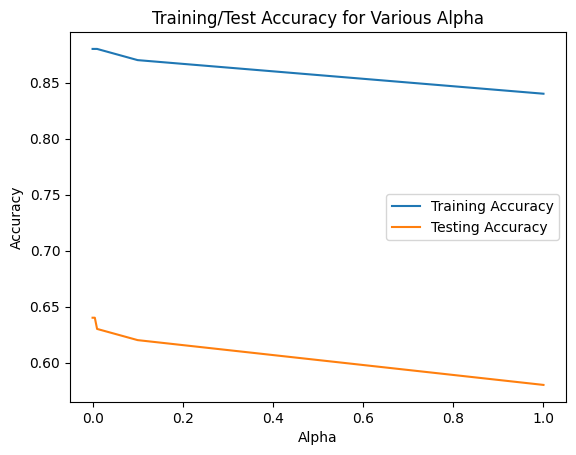

In [ ]:
plt.plot(alpha_vals, train_acc, label="Training Accuracy")
plt.plot(alpha_vals,test_acc,label="Testing Accuracy")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Training/Test Accuracy for Various Alpha")
plt.legend()
plt.show()

array([[  13,   40,   66,   50,   13,  142],
       [   1,   38,   23,    6,    0,    1],
       [   0,   10,   17,   12,    3,    4],
       [   0,   18,   39,   35,    5,    8],
       [   2,   27,   71,  101,   33,   98],
       [  14,  133,  282,  242,  136, 1953]])

              precision    recall  f1-score   support

           0       0.43      0.04      0.07       324
           1       0.14      0.55      0.23        69
           2       0.03      0.37      0.06        46
           3       0.08      0.33      0.13       105
           4       0.17      0.10      0.13       332
           5       0.89      0.71      0.79      2760

    accuracy                           0.57      3636
   macro avg       0.29      0.35      0.23      3636
weighted avg       0.73      0.57      0.62      3636



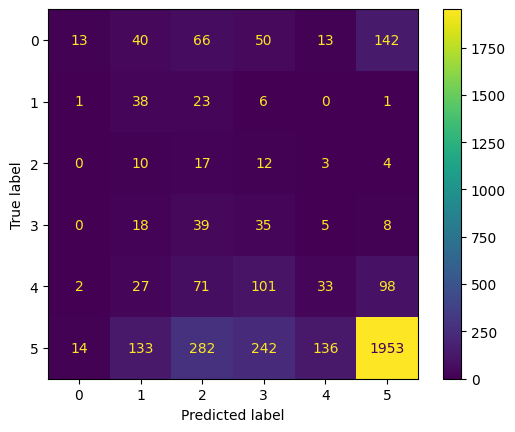

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
myconfusionmatrix = confusion_matrix(y_test, nb_y_pred, labels=nb_classifier.classes_)
display(myconfusionmatrix)
mycmdisp = ConfusionMatrixDisplay(confusion_matrix=myconfusionmatrix, display_labels=nb_classifier.classes_)
mycmdisp.plot()
print(classification_report(y_test, nb_y_pred))

In [ ]:
cm = confusion_matrix(y_test, nb_y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[  13   40   66   50   13  142]
 [   1   38   23    6    0    1]
 [   0   10   17   12    3    4]
 [   0   18   39   35    5    8]
 [   2   27   71  101   33   98]
 [  14  133  282  242  136 1953]]


In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
print("False Positives for each class:", FP)
FN = cm.sum(axis=1) - np.diag(cm)
print("False Negatives for each class:", FN)

False Positives for each class: [ 17 228 481 411 157 253]
False Negatives for each class: [311  31  29  70 299 807]
